In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
BASE_DIR = Path().resolve().parent
BASE_DIR

WindowsPath('C:/Users/Sadegh/code/nencki-image-segmentation')

In [3]:
CSV_DIR = BASE_DIR / "data/features_final"
CSV_DIR

WindowsPath('C:/Users/Sadegh/code/nencki-image-segmentation/data/features_final')

In [4]:
dfs = {}

for csv_file in CSV_DIR.glob('*.csv'):
    df_name = csv_file.stem
    dfs[df_name] = pd.read_csv(csv_file)

# Select Biopsy 

In [13]:
df_2503 = dfs.get('biopsy_5731_bottom')
df_2503

,Object ID,area,centroid-0,centroid-1,ROI,Image,Cell: CD45: Mean,Cell: CD45: Median,Cell: CD8: Mean,Cell: CD8: Median,...,Cell: CD68: Mean,Cell: CD68: Median,Cell: FOXP3: Mean,Cell: FOXP3: Median,Nucleus: H3K27M: Mean,Nucleus: H3K27M: Median,Cell: LGALS3: Mean,Cell: LGALS3: Median,Cell: TMEM119: Mean,Cell: TMEM119: Median
0,1,1272,14270.654088,11380.952830,bottom,biopsy_5731_bottom,1.343553,1.0,0.000000,0.0,...,0.350629,0.0,1.273585,1.0,53.527027,52.5,0.133648,0.0,0.645440,0.0
1,2,1166,14316.453688,11381.358491,bottom,biopsy_5731_bottom,1.810463,2.0,0.000000,0.0,...,0.559177,0.0,2.309605,2.0,64.364706,60.0,0.137221,0.0,0.752144,0.5
2,3,487,14353.119097,11399.572895,bottom,biopsy_5731_bottom,5.585216,5.0,0.000000,0.0,...,2.211499,2.0,5.726899,6.0,38.829060,38.0,0.252567,0.0,5.722793,3.0
3,4,673,14371.918276,11415.219911,bottom,biopsy_5731_bottom,6.387816,5.0,0.002972,0.0,...,3.800892,2.0,7.301634,7.0,54.415493,54.0,0.292719,0.0,3.836553,3.0
4,5,966,14398.304348,11390.476190,bottom,biopsy_5731_bottom,5.324017,5.0,0.002070,0.0,...,2.154244,2.0,7.519669,7.0,34.221053,32.0,0.424431,0.0,2.948240,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11402,11403,504,28996.059524,8879.970238,bottom,biopsy_5731_bottom,6.855159,7.0,0.001984,0.0,...,0.015873,0.0,0.051587,0.0,70.902778,70.0,0.011905,0.0,0.025794,0.0
11403,11404,712,29374.370787,6937.005618,bottom,biopsy_5731_bottom,2.685393,0.0,6.384831,0.0,...,1.689607,0.0,1.250000,0.0,84.178571,80.5,0.035112,0.0,3.608146,0.0
11404,11405,212,29778.254717,7358.768868,bottom,biopsy_5731_bottom,0.004717,0.0,0.099057,0.0,...,0.009434,0.0,0.231132,0.0,48.625616,49.0,0.004717,0.0,0.018868,0.0
11405,11406,253,29789.573123,6179.494071,bottom,biopsy_5731_bottom,0.007905,0.0,0.027668,0.0,...,0.015810,0.0,70.889328,70.0,89.751020,89.0,0.015810,0.0,0.790514,1.0


In [14]:
markers = ["GPNMB", "TMEM119", "CD68", "CD45", "LGALS3"]
markers

['GPNMB', 'TMEM119', 'CD68', 'CD45', 'LGALS3']

In [15]:
df_2503.columns

Index(['Object ID', 'area', 'centroid-0', 'centroid-1', 'ROI', 'Image',
       'Cell: CD45: Mean', 'Cell: CD45: Median', 'Cell: CD8: Mean',
       'Cell: CD8: Median', 'Cell: CD163: Mean', 'Cell: CD163: Median',
       'Cell: GPNMB: Mean', 'Cell: GPNMB: Median', 'Cell: CD3e: Mean',
       'Cell: CD3e: Median', 'Cell: CD68: Mean', 'Cell: CD68: Median',
       'Cell: FOXP3: Mean', 'Cell: FOXP3: Median', 'Nucleus: H3K27M: Mean',
       'Nucleus: H3K27M: Median', 'Cell: LGALS3: Mean', 'Cell: LGALS3: Median',
       'Cell: TMEM119: Mean', 'Cell: TMEM119: Median'],
      dtype='object')

In [16]:
markers = {
    "CD68": "Cell: CD68: Mean",
    "TMEM119": "Cell: TMEM119: Mean",
    "CD45": "Cell: CD45: Mean",
    # "LGALS3": "Cell: LGALS3: Mean",
     "GPNMB": "Cell: GPNMB: Mean"
}

thresholds = {k: df_2503[v].mean() for k, v in markers.items()}
thresholds

{'CD68': 3.7174554191344598,
 'TMEM119': 25.038932431408885,
 'CD45': 11.014925743570993,
 'GPNMB': 1.8276593851473448}

In [17]:
df_pos = df_2503.copy()

for marker, col in markers.items():
    df_pos[marker + "_pos"] = df_2503[col] > thresholds[marker]

In [18]:
cd45_pos_df = df_pos[df_pos["CD45_pos"]]
total_cd45 = len(cd45_pos_df)

In [19]:
groups = {
    "GPNMB+ CD68+ TMEM119+ CD45+": (
        (cd45_pos_df["GPNMB_pos"]) &
        (cd45_pos_df["CD68_pos"]) &
        (cd45_pos_df["TMEM119_pos"])
    ),

    "GPNMB- CD68+ TMEM119+ CD45+": (
        (~cd45_pos_df["GPNMB_pos"]) &
        (cd45_pos_df["CD68_pos"]) &
        (cd45_pos_df["TMEM119_pos"])
    ),

    "GPNMB+ CD68+ TMEM119- CD45+": (
        (cd45_pos_df["GPNMB_pos"]) &
        (cd45_pos_df["CD68_pos"]) &
        (~cd45_pos_df["TMEM119_pos"])
    ),

    "GPNMB- CD68+ TMEM119- CD45+": (
        (~cd45_pos_df["GPNMB_pos"]) &
        (cd45_pos_df["CD68_pos"]) &
        (~cd45_pos_df["TMEM119_pos"])
    ),
}


In [20]:
results = {
    name: (mask.sum() / total_cd45) * 100
    for name, mask in groups.items()
}

result_df = pd.DataFrame.from_dict(
    results, orient="index", columns=["Percent_of_CD45"]
)
result_df

,Percent_of_CD45
GPNMB+ CD68+ TMEM119+ CD45+,7.595644
GPNMB- CD68+ TMEM119+ CD45+,29.628595
GPNMB+ CD68+ TMEM119- CD45+,24.322815
GPNMB- CD68+ TMEM119- CD45+,7.428093


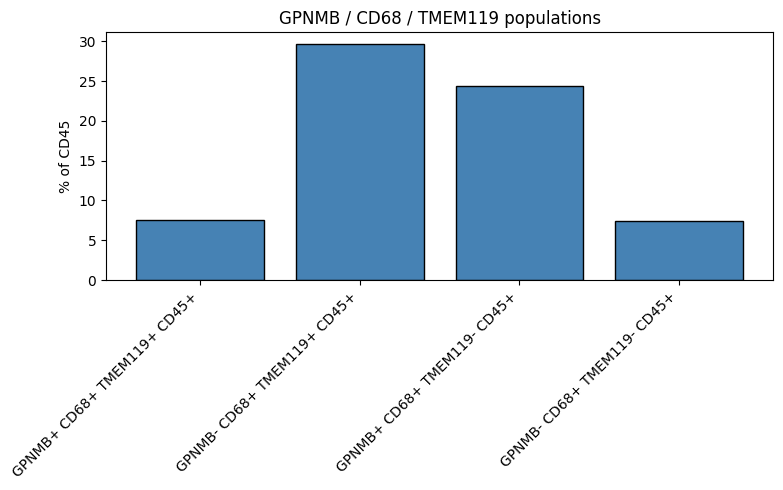

In [21]:
plt.figure(figsize=(8, 5))

plt.bar(
    result_df.index,
    result_df["Percent_of_CD45"],
    color="steelblue",
    edgecolor="black"
)

plt.ylabel("% of CD45")
plt.xticks(rotation=45, ha="right")
plt.title("GPNMB / CD68 / TMEM119 populations")
plt.tight_layout()
plt.show()
